In [1]:
import pandas as pd

# Important

Jika ada hal yang dirasa abu-abu, silahkan jawab jawaban dengan asumsi logis yang anda miliki.  
Penilaian tugas tidak hanya sekedar dilihat dari hasil yang dikeluarkan, melainkan penjelasan atas langkah-langkah yang anda ambil dalam analisis. Sertakan penjelasan dengan menggunakan simbol komentar.  
Kualitas seorang Data Analyst yang baik adalah mampu menyampaikan analisis dengan baik.

Definisi data : https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset?select=events.csv  
Kita hanya akan menggunakan file events.csv jadi pastikan kalian telah memahami data dengan baik sebelum mulai mengerjakan homework ini

In [3]:
import os
os.getcwd() # Mengetahui working directory sekarang

'/Users/macair/Documents/jihad/Data Analyst/Growia/Modul 8'

In [5]:
os.listdir() # Melihat daftar file di working directory sekarang

['.DS_Store',
 'dataset',
 'Jihad Rafsanjani - Tugas Modul 8 Aplikasi Praktis Analitik Data Untuk Pemasaran dan Penjualan.ipynb.zip',
 'Jihad Rafsanjani - Tugas Modul 8 Aplikasi Praktis Analitik Data Untuk Pemasaran dan Penjualan.ipynb',
 '.ipynb_checkpoints']

In [7]:
#Load data csv
df = pd.read_csv('./dataset/events.csv')
df['datetime'] = pd.to_datetime(df['timestamp'],unit='ms') # Data awalnya merupakan linux timestamp, akan dikonversikan menjadi format datetime standard pandas

In [9]:
df['date_key'] = df['datetime'].dt.normalize() # mereset komponen jam pada datetime sehingga hanya menggunakan tanggal

In [11]:
df

,timestamp,visitorid,event,itemid,transactionid,datetime,date_key
0,1433221332117,257597,view,355908,NaN,2015-06-02 05:02:12.117,2015-06-02
1,1433224214164,992329,view,248676,NaN,2015-06-02 05:50:14.164,2015-06-02
2,1433221999827,111016,view,318965,NaN,2015-06-02 05:13:19.827,2015-06-02
3,1433221955914,483717,view,253185,NaN,2015-06-02 05:12:35.914,2015-06-02
4,1433221337106,951259,view,367447,NaN,2015-06-02 05:02:17.106,2015-06-02
...,...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN,2015-08-01 03:13:05.939,2015-08-01
2756097,1438399813142,762376,view,115946,NaN,2015-08-01 03:30:13.142,2015-08-01
2756098,1438397820527,1251746,view,78144,NaN,2015-08-01 02:57:00.527,2015-08-01
2756099,1438398530703,1184451,view,283392,NaN,2015-08-01 03:08:50.703,2015-08-01


In [13]:
#Menampilkan informasi data
print(df.head())
print(df.info())
print(df.describe())

       timestamp  visitorid event  itemid  transactionid  \
0  1433221332117     257597  view  355908            NaN   
1  1433224214164     992329  view  248676            NaN   
2  1433221999827     111016  view  318965            NaN   
3  1433221955914     483717  view  253185            NaN   
4  1433221337106     951259  view  367447            NaN   

                 datetime   date_key  
0 2015-06-02 05:02:12.117 2015-06-02  
1 2015-06-02 05:50:14.164 2015-06-02  
2 2015-06-02 05:13:19.827 2015-06-02  
3 2015-06-02 05:12:35.914 2015-06-02  
4 2015-06-02 05:02:17.106 2015-06-02  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 7 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      int64         
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
 5   datetime       datetime64[ns]
 6   date_key

In [15]:
#menampilkan missing values
missing_values = df.isnull().sum()
print(missing_values)

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
datetime               0
date_key               0
dtype: int64


In [17]:
#mengisi missing values dengan 0
df = df.fillna({'transactionid': '0'})  # Mengisi missing values dengan nilai tertentu

In [19]:
#Memeriksa apakah ada null values
df.isnull().any()

timestamp        False
visitorid        False
event            False
itemid           False
transactionid    False
datetime         False
date_key         False
dtype: bool

In [21]:
#Melihat data yang memiliki null values
df[df['transactionid'].isna()]

,timestamp,visitorid,event,itemid,transactionid,datetime,date_key


In [25]:
df

,timestamp,visitorid,event,itemid,transactionid,datetime,date_key
0,1433221332117,257597,view,355908,0,2015-06-02 05:02:12.117,2015-06-02
1,1433224214164,992329,view,248676,0,2015-06-02 05:50:14.164,2015-06-02
2,1433221999827,111016,view,318965,0,2015-06-02 05:13:19.827,2015-06-02
3,1433221955914,483717,view,253185,0,2015-06-02 05:12:35.914,2015-06-02
4,1433221337106,951259,view,367447,0,2015-06-02 05:02:17.106,2015-06-02
...,...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,0,2015-08-01 03:13:05.939,2015-08-01
2756097,1438399813142,762376,view,115946,0,2015-08-01 03:30:13.142,2015-08-01
2756098,1438397820527,1251746,view,78144,0,2015-08-01 02:57:00.527,2015-08-01
2756099,1438398530703,1184451,view,283392,0,2015-08-01 03:08:50.703,2015-08-01


In [27]:
#Mengecek data type
df.dtypes

timestamp                 int64
visitorid                 int64
event                    object
itemid                    int64
transactionid            object
datetime         datetime64[ns]
date_key         datetime64[ns]
dtype: object

<Axes: ylabel='event'>

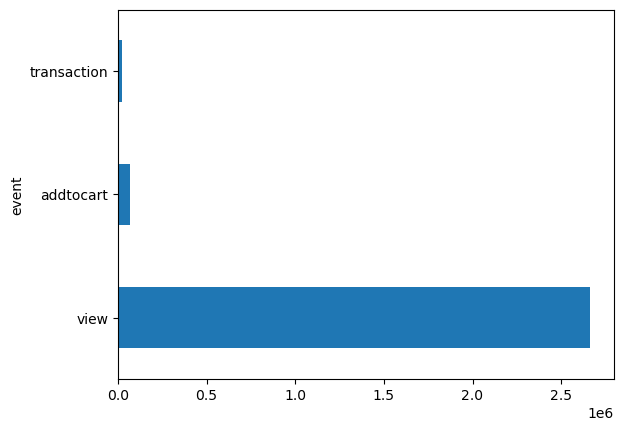

In [29]:
#Melihat jumlah event berdasarkan jenis
df['event'].value_counts().plot(kind='barh')

In [31]:
# Filter hanya untuk events yang mengandung view, addtocart, transaction
df_filtered = df[df['event'].isin(['view', 'addtocart', 'transaction'])]

In [33]:
# Convert timestamp to datetime and create date_key
df_filtered['timestamp'] = pd.to_datetime(df_filtered['timestamp'], unit='ms')
df_filtered['date_key'] = df_filtered['timestamp'].dt.date


In [35]:
# Group by date_key, itemid and calculate the number of events
df_grouped = df_filtered.groupby(['date_key', 'itemid', 'event']).size().unstack(fill_value=0)
df_grouped = df_grouped.reset_index().fillna(0)

In [37]:
# Ensure columns exist
for col in ['view', 'addtocart', 'transaction']:
    if col not in df_grouped.columns:
        df_grouped[col] = 0

df_grouped = df_grouped[['date_key', 'itemid', 'view', 'addtocart', 'transaction']]

In [39]:
df_grouped

event,date_key,itemid,view,addtocart,transaction
0,2015-05-03,16,1,0,0
1,2015-05-03,19,1,0,0
2,2015-05-03,32,1,0,0
3,2015-05-03,33,1,1,0
4,2015-05-03,42,1,0,0
...,...,...,...,...,...
1672181,2015-09-18,464474,2,0,0
1672182,2015-09-18,464538,1,0,0
1672183,2015-09-18,465387,1,0,0
1672184,2015-09-18,466321,1,0,0


In [41]:
df_grouped.sort_values('transaction')

event,date_key,itemid,view,addtocart,transaction
0,2015-05-03,16,1,0,0
1111440,2015-07-30,48460,1,0,0
1111439,2015-07-30,48451,1,0,0
1111438,2015-07-30,48425,2,0,0
1111436,2015-07-30,48360,1,0,0
...,...,...,...,...,...
1463585,2015-08-30,173653,21,7,6
936990,2015-07-16,445351,42,7,6
1405839,2015-08-25,134484,17,6,6
1408811,2015-08-25,248455,45,7,6


In [43]:
df_grouped.shape

(1672186, 5)

In [45]:
print(df_grouped.head())
print(df_grouped.info())

event    date_key  itemid  view  addtocart  transaction
0      2015-05-03      16     1          0            0
1      2015-05-03      19     1          0            0
2      2015-05-03      32     1          0            0
3      2015-05-03      33     1          1            0
4      2015-05-03      42     1          0            0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672186 entries, 0 to 1672185
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   date_key     1672186 non-null  object
 1   itemid       1672186 non-null  int64 
 2   view         1672186 non-null  int64 
 3   addtocart    1672186 non-null  int64 
 4   transaction  1672186 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 63.8+ MB
None


# 1. Data Preprocessing
Data pada level transaksi dan belum siap digunakan untuk analisis harian.  
Lakukan data preprocessing dengan pandas sesuai dengan materi yang sudah ada pelajari sehingga data di rekap dalam level harian untuk setiap itemid seperti berikut : 

In [47]:
df_grouped.describe()

event,itemid,view,addtocart,transaction
count,1.672186e+06,1.672186e+06,1.672186e+06,1.672186e+06
mean,2.339858e+05,1.593311e+00,4.146189e-02,1.342973e-02
std,1.342573e+05,1.832306e+00,2.535295e-01,1.262840e-01
min,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.170030e+05,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.343790e+05,1.000000e+00,0.000000e+00,0.000000e+00
75%,3.501950e+05,2.000000e+00,0.000000e+00,0.000000e+00
max,4.668670e+05,3.330000e+02,3.200000e+01,8.000000e+00


In [49]:
# TULIS CODE ANDA DISINI
# Membulatkan angka dalam dataframe ke 1 angka di belakang koma
# Konversi kolom ke format float jika belum dalam format numerik
df_grouped['view'] = df_grouped['view'].astype(float)
df_grouped['addtocart'] = df_grouped['addtocart'].astype(float)
df_grouped['transaction'] = df_grouped['transaction'].astype(float)

df_daily = df_grouped.round({'view': 1, 'addtocart': 1, 'transaction': 1}) # tidak harus 1 line saja
df_daily

event,date_key,itemid,view,addtocart,transaction
0,2015-05-03,16,1.0,0.0,0.0
1,2015-05-03,19,1.0,0.0,0.0
2,2015-05-03,32,1.0,0.0,0.0
3,2015-05-03,33,1.0,1.0,0.0
4,2015-05-03,42,1.0,0.0,0.0
...,...,...,...,...,...
1672181,2015-09-18,464474,2.0,0.0,0.0
1672182,2015-09-18,464538,1.0,0.0,0.0
1672183,2015-09-18,465387,1.0,0.0,0.0
1672184,2015-09-18,466321,1.0,0.0,0.0


In [51]:
#Cek table
df_daily.sort_values('transaction')

event,date_key,itemid,view,addtocart,transaction
0,2015-05-03,16,1.0,0.0,0.0
1111440,2015-07-30,48460,1.0,0.0,0.0
1111439,2015-07-30,48451,1.0,0.0,0.0
1111438,2015-07-30,48425,2.0,0.0,0.0
1111436,2015-07-30,48360,1.0,0.0,0.0
...,...,...,...,...,...
1463585,2015-08-30,173653,21.0,7.0,6.0
936990,2015-07-16,445351,42.0,7.0,6.0
1405839,2015-08-25,134484,17.0,6.0,6.0
1408811,2015-08-25,248455,45.0,7.0,6.0


In [53]:
#Membuat kolom
funnel_cols = ["view","addtocart","transaction"]

In [55]:
#Menghitung total transaksi
df_plot_funnel = df_daily[funnel_cols].sum(axis=0).to_frame('count').reset_index()

In [57]:
df_plot_funnel

,event,count
0,view,2664312.0
1,addtocart,69332.0
2,transaction,22457.0


# 2. Data Analysis
Gunakan df_daily sesuai soal nomor 1.  
Apabila tidak bisa menjawab soal nomor 1, harap gunakan file df_daily_item_activity.csv sebagai penggantinya.

## 2.a Setelah melakukan rekap harian per produk, coba lakukan rekap harian secara total.  
Rekap harian secara total artinya hitung berapa banyak total view yang terjadi, total addtocart yang terjadi dan total transaction yang terjadi di setiap harinya

## 2.b Setelah membuat rekap harian secara total, buatlah visualisasi yang menggambarkan pergerakan setiap event di setiap harinya dan BERIKAN MINIMAL 2 INSIGHT/ANALISIS dari grafik.

## 2.c Apakah ada kendala dari proses addtocard hingga customer melakukan transaction? Gunakan funnel analysis untuk mencari tahu.

In [59]:
df_daily.sort_values('transaction')

event,date_key,itemid,view,addtocart,transaction
0,2015-05-03,16,1.0,0.0,0.0
1111440,2015-07-30,48460,1.0,0.0,0.0
1111439,2015-07-30,48451,1.0,0.0,0.0
1111438,2015-07-30,48425,2.0,0.0,0.0
1111436,2015-07-30,48360,1.0,0.0,0.0
...,...,...,...,...,...
1463585,2015-08-30,173653,21.0,7.0,6.0
936990,2015-07-16,445351,42.0,7.0,6.0
1405839,2015-08-25,134484,17.0,6.0,6.0
1408811,2015-08-25,248455,45.0,7.0,6.0


In [61]:
#Melakukan rekap harian perproduct
rekap_harian_perproduk = df_daily.groupby(['date_key', 'itemid']).agg({
    'view': 'sum',
    'addtocart': 'sum',
    'transaction': 'sum'
}).reset_index()

In [63]:
#Membuat rekap harian perproduk dan mengurutkan tanggal dan produk dengan transaksi terbanyak
rekap_harian_perproduk.sort_values(["date_key","transaction"], ascending=[True, False])

event,date_key,itemid,view,addtocart,transaction
4844,2015-05-03,259357,11.0,3.0,3.0
8283,2015-05-03,441645,6.0,2.0,2.0
15,2015-05-03,829,16.0,1.0,1.0
57,2015-05-03,4001,7.0,1.0,1.0
205,2015-05-03,12404,6.0,1.0,1.0
...,...,...,...,...,...
1672181,2015-09-18,464474,2.0,0.0,0.0
1672182,2015-09-18,464538,1.0,0.0,0.0
1672183,2015-09-18,465387,1.0,0.0,0.0
1672184,2015-09-18,466321,1.0,0.0,0.0


In [65]:
#2.a Setelah melakukan rekap harian per produk, coba lakukan rekap harian secara total.
#Rekap harian secara total artinya hitung berapa banyak total view yang terjadi, total addtocart yang terjadi dan total transaction yang terjadi di setiap harinya
# Melakukan rekap harian secara total
#Membuat rekap harian total
rekap_harian_total = df_daily.groupby(['date_key']).agg({
    'view': 'sum',
    'addtocart': 'sum',
    'transaction': 'sum'
}).reset_index()

In [67]:
rekap_harian_total = rekap_harian_total.round({'view': 1, 'addtocart': 1, 'transaction': 1})

In [69]:
#Melihat data rekap harial total
rekap_harian_total

event,date_key,view,addtocart,transaction
0,2015-05-03,13304.0,296.0,83.0
1,2015-05-04,18681.0,579.0,154.0
2,2015-05-05,22225.0,565.0,225.0
3,2015-05-06,23015.0,647.0,258.0
4,2015-05-07,22369.0,578.0,217.0
...,...,...,...,...
134,2015-09-14,20284.0,475.0,154.0
135,2015-09-15,19674.0,595.0,158.0
136,2015-09-16,11022.0,336.0,137.0
137,2015-09-17,9830.0,253.0,45.0


In [71]:
#Melihat data statistik berdasarkan event
rekap_total = rekap_harian_total[['view', 'addtocart', 'transaction']]
statistik = {
    'Rata-rata': rekap_total.mean(),
    'Median': rekap_total.median(),
    'Jumlah': rekap_total.sum(),
    'Standar Deviasi': rekap_total.std()
}
statistik_df = pd.DataFrame(statistik)

In [73]:
#Menampilkan data statistik seperti rata - rata, median, jumlah, standar deviasi
statistik_df

,Rata-rata,Median,Jumlah,Standar Deviasi
event,,,,
view,19167.712230,19962.0,2664312.0,4024.353894
addtocart,498.791367,514.0,69332.0,125.046570
transaction,161.561151,162.0,22457.0,58.246368


Berdasarkan hasil analisa statistik diatas, kita dapat melihat bahwa rata - rata pada transaction dapat menggambarkan nilai tengah atau median dari transaction tersebut. sementara rata - rata untuk view dan addtocart tidak dapat menggambarkan nilai tengahnya karena ada perbedaan nilai yang cukup besar.

In [75]:
df_daily['date_key'] = pd.to_datetime(df_daily['date_key'])

<Axes: xlabel='date_key'>

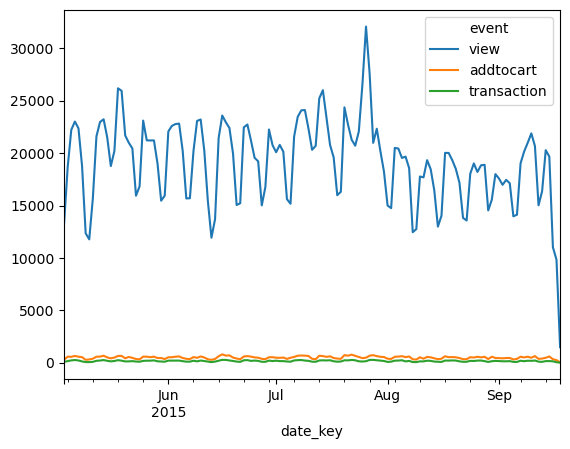

In [77]:
df_daily.groupby('date_key')[funnel_cols].sum().plot()

Berdasarkan grafik diatas dapat dilihat bahwa fluktuasi view sangat tinggi dan pada pertengahan september mengalami penurunan drastis, sementara addtocart dan transaction cenderung stabil bahkan hingga pertengahan september dimana view mengalami penurunan yang signifikan.

In [99]:
#Menghitung prevous count untuk digunakan mengitung conversion rate
df_plot_funnel = df_daily[funnel_cols].sum(axis=0).to_frame('count').reset_index()
df_plot_funnel['count_from_previous'] = df_plot_funnel['count'].shift(1)

In [101]:
#Menghitung conversion rate untuk mengetahui nilai persentase conversi setia event
df_plot_funnel['conversion_rate'] = (df_plot_funnel['count']/df_plot_funnel['count_from_previous']) * 100
df_plot_funnel

,event,count,count_from_previous,conversion_rate
0,view,2664312.0,NaN,NaN
1,addtocart,69332.0,2664312.0,2.602248
2,transaction,22457.0,69332.0,32.390527


In [83]:
#2.b Setelah membuat rekap harian secara total, buatlah visualisasi yang menggambarkan pergerakan setiap event di setiap harinya 
#dan BERIKAN MINIMAL 2 INSIGHT/ANALISIS dari grafik.¶
import matplotlib.pyplot as plt
import seaborn as sns

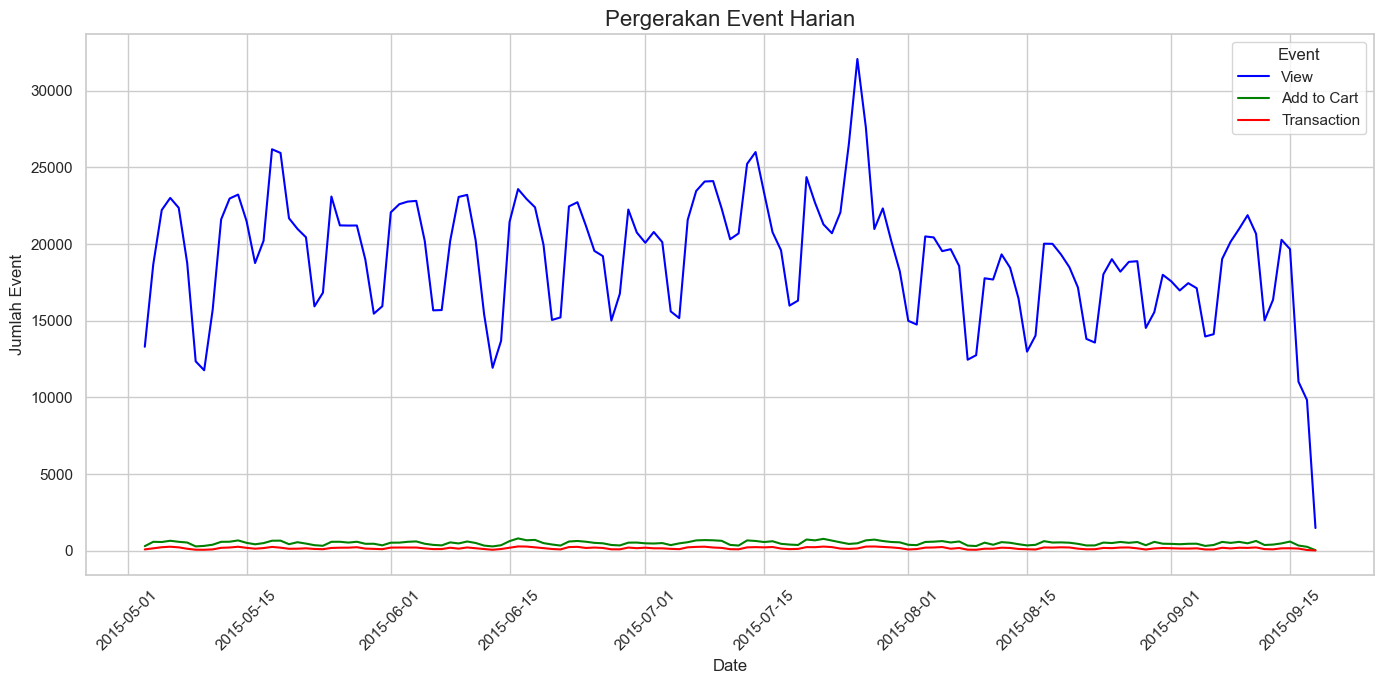

In [85]:
# Set the style of the visualizations
sns.set(style="whitegrid")

# Plot line for each event
plt.figure(figsize=(14, 7))

# Plotting views
sns.lineplot(x='date_key', y='view', data=rekap_harian_total, label='View', color='blue')

# Plotting addtocart
sns.lineplot(x='date_key', y='addtocart', data=rekap_harian_total, label='Add to Cart', color='green')

# Plotting transaction
sns.lineplot(x='date_key', y='transaction', data=rekap_harian_total, label='Transaction', color='red')

# Setting titles and labels
plt.title('Pergerakan Event Harian', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Jumlah Event', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Event')
plt.tight_layout()

# Show the plot
plt.show()


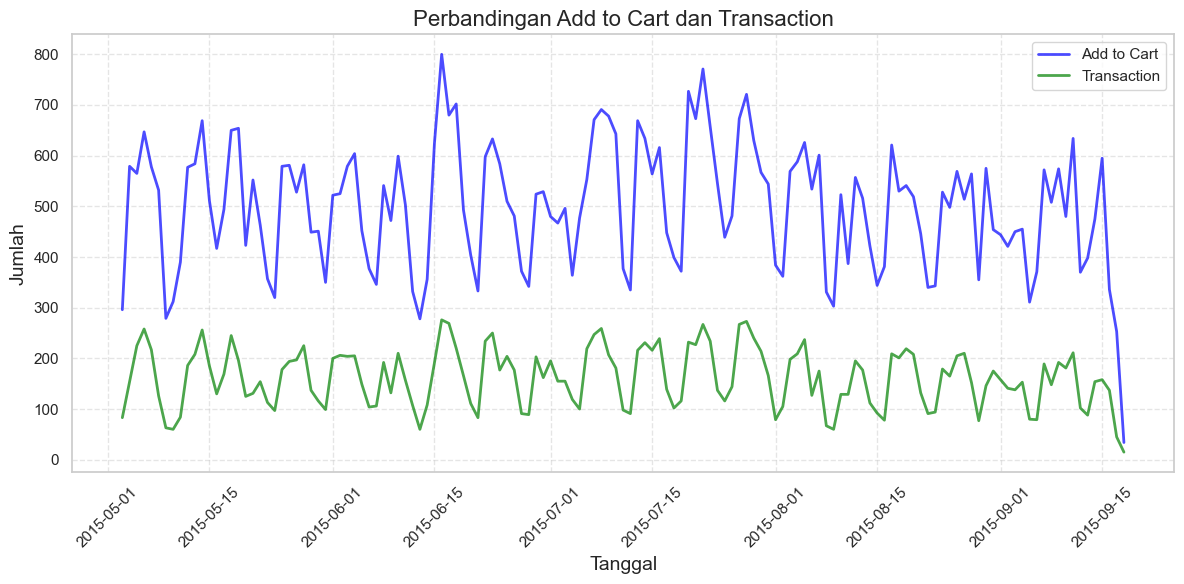

In [111]:
# Mengonversi kolom 'date_key' menjadi datetime jika belum
df_r = rekap_harian_total
df_r['date_key'] = pd.to_datetime(rekap_harian_total['date_key'])

# Mengatur 'date_key' sebagai indeks
df_r.set_index('date_key', inplace=True)

# Membuat plot dengan tampilan minimalis
plt.figure(figsize=(12, 6))
plt.plot(df_r['addtocart'], label='Add to Cart', color='blue', linewidth=2, alpha=0.7)
plt.plot(df_r['transaction'], label='Transaction', color='green', linewidth=2, alpha=0.7)

# Menambahkan elemen visual
plt.title('Perbandingan Add to Cart dan Transaction', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [87]:
total_views = df_daily['view'].sum()
total_addtocart = df_daily['addtocart'].sum()
total_transactions = df_daily['transaction'].sum()

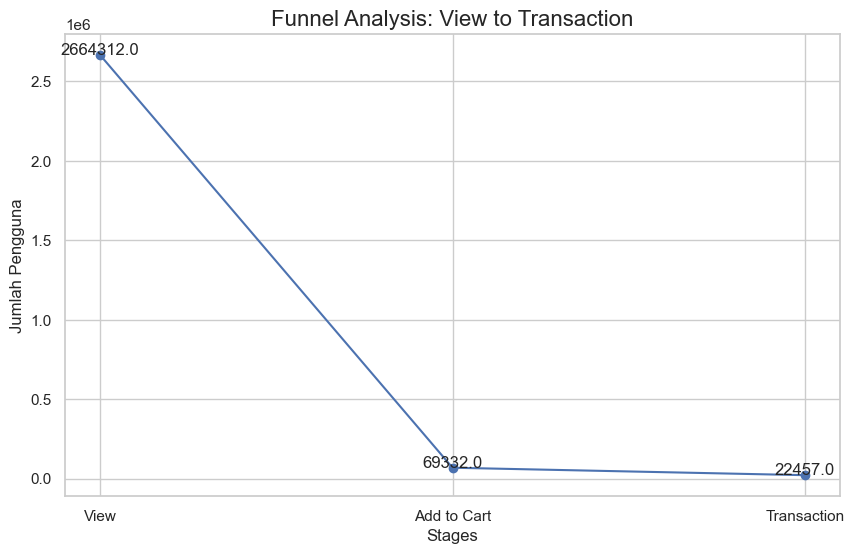

In [89]:
# Menggunakan matplotlib untuk visualisasi funnel
stages = ['View', 'Add to Cart', 'Transaction']
values = [total_views, total_addtocart, total_transactions]

plt.figure(figsize=(10, 6))
plt.plot(stages, values, marker='o', linestyle='-', color='b')

# Annotate values
for i, value in enumerate(values):
    plt.text(i, value + 1000, f'{value}', ha='center', fontsize=12)

plt.title('Funnel Analysis: View to Transaction', fontsize=16)
plt.xlabel('Stages', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.show()

In [91]:
df_plot_funnel = df_daily[funnel_cols].sum(axis=0).to_frame('count').reset_index()
df_plot_funnel

,event,count
0,view,2664312.0
1,addtocart,69332.0
2,transaction,22457.0


In [163]:
df_plot_funnel

,event,count,count_from_previous,conversion_rate
0,view,2664312.0,NaN,NaN
1,addtocart,69332.0,2664312.0,2.602248
2,transaction,22457.0,69332.0,32.390527


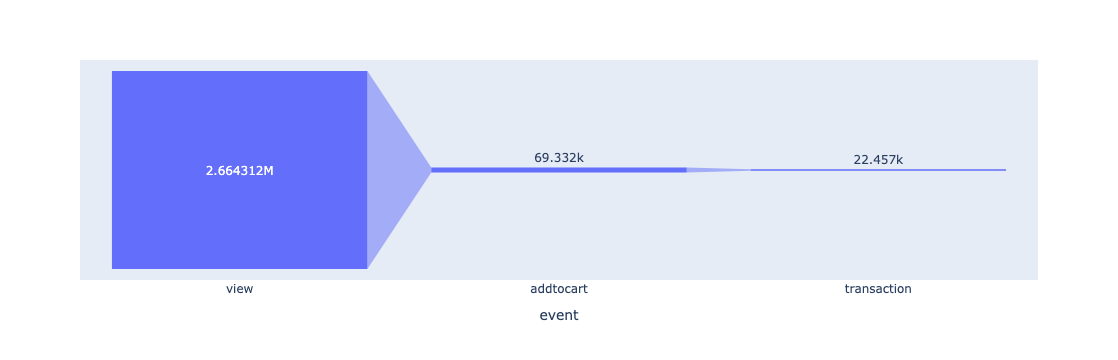

In [145]:
import plotly.express as px
# Membuat funnel chart untuk seluruh transaksi
fig = px.funnel(df_plot_funnel, y='count', x='event')

# Display the chart
fig.show()

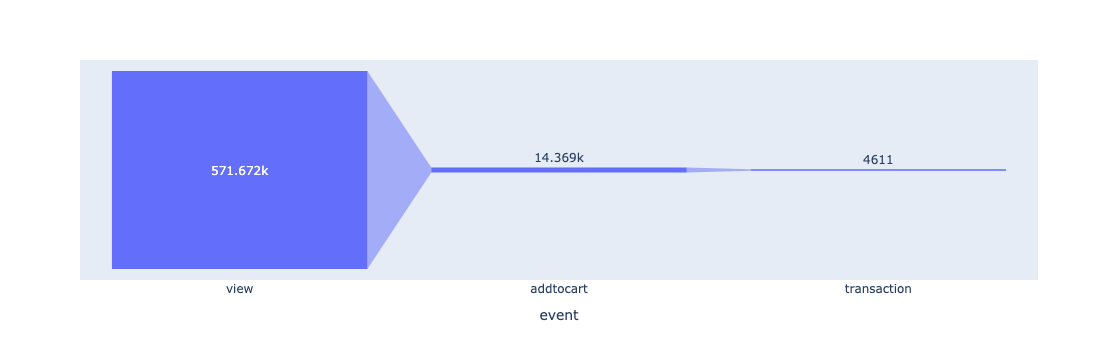

In [157]:
#Membuat  funnel chart untuk transaksi 1 bulan pertama
import plotly.express as px
df_plot_funnel_first = rekap_harian_total.query("date_key<'2015-06-01'")[funnel_cols].sum(axis=0).to_frame('count').reset_index()
fig = px.funnel(df_plot_funnel_first,y='count', x='event')
fig.show()

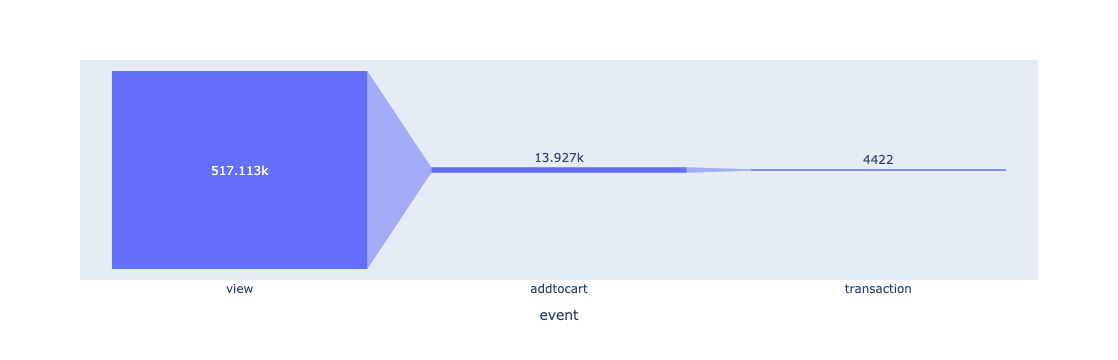

In [155]:
#Membuat  funnel chart untuk transaksi 1 bulan pertama
import plotly.express as px
df_plot_funnel_last = rekap_harian_total.query("date_key>'2015-08-18'")[funnel_cols].sum(axis=0).to_frame('count').reset_index()
fig = px.funnel(df_plot_funnel_last,y='count', x='event')
fig.show()

Berdasarkan grafik funnel dapat kita ketahui bahwa nilai conversi dari view menuju event addtocart sangat rendah yaitu hanya 14300 transaksi dibulan pertama dan 13927 transaksi dibulan terakhir. Ini merupakan funnel chart yang tidak sehat karena convertion rate yang sangat rendah dari vews menuju event. Hal ini bisa terjadi mungkin kerana adanya masalah pengalaman pengguna (user experience), seperti proses checkout yang rumit atau kurangnya informasi produk yang memadai, yang menghalangi konsumen untuk menyelesaikan pembelian.

# 3. RF Analysis

Karena pada data ini tidak ada informasi mengenai nilai dari item yang dibeli, maka analisis akan mengabaikan komponen M.

## 3.a Hitunglah sudah berapa hari sejak customer terakhir kali melakukan transaksi. 
Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa hari sejak transaksi berlalu

## 3.b berdasarkan hasil sebelumnya, bagi customer menjadi 4 kelompok berdasarkan aspek waktu transaksi terakhir.

In [103]:
df

,timestamp,visitorid,event,itemid,transactionid,datetime,date_key
0,1433221332117,257597,view,355908,0,2015-06-02 05:02:12.117,2015-06-02
1,1433224214164,992329,view,248676,0,2015-06-02 05:50:14.164,2015-06-02
2,1433221999827,111016,view,318965,0,2015-06-02 05:13:19.827,2015-06-02
3,1433221955914,483717,view,253185,0,2015-06-02 05:12:35.914,2015-06-02
4,1433221337106,951259,view,367447,0,2015-06-02 05:02:17.106,2015-06-02
...,...,...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,0,2015-08-01 03:13:05.939,2015-08-01
2756097,1438399813142,762376,view,115946,0,2015-08-01 03:30:13.142,2015-08-01
2756098,1438397820527,1251746,view,78144,0,2015-08-01 02:57:00.527,2015-08-01
2756099,1438398530703,1184451,view,283392,0,2015-08-01 03:08:50.703,2015-08-01


# 3.a Hitunglah sudah berapa hari sejak customer terakhir kali melakukan transaksi.
# Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa hari sejak transaksi berlalu

In [159]:
#Menghitung jumlah transaction yang terjadi berdasarkan transactionid yang ada
df['transactionid'].loc[df['transactionid'] != 0].count()

2756100

In [165]:
df['event'].loc[df['event'] == "transaction"].count()
# df[df['event'].isin(['transaction'])].count()

22457

In [171]:
df[(df['event'] == "transaction")].count()

timestamp        22457
visitorid        22457
event            22457
itemid           22457
transactionid    22457
datetime         22457
date_key         22457
dtype: int64

In [169]:
import pandas as pd
from datetime import datetime

# Filter hanya transaksi yang valid (transactionid != 0)
valid_transactions = df[(df['event'] == "transaction")]
# Pilih transaksi terakhir untuk setiap visitorid
valid_transactions = valid_transactions.sort_values('date_key').groupby('visitorid').tail(1)
# Mendapatkan tanggal transaksi terakhir
latest_date = valid_transactions['date_key'].max()
# Menghitung hari sejak transaksi terakhir untuk setiap transaksi
valid_transactions['days_since_last_transaction'] = (latest_date - valid_transactions['date_key']).dt.days
# Menampilkan kolom 'days_since_last_transaction'
valid_transactions['days_since_last_transaction']


1476967    138
1476928    138
1476099    138
1475925    138
1475731    138
          ... 
1457781      0
1456595      0
1455216      0
1460839      0
1462449      0
Name: days_since_last_transaction, Length: 11719, dtype: int64

In [173]:
valid_transactions

,timestamp,visitorid,event,itemid,transactionid,datetime,date_key,days_since_last_transaction
1476967,1430684682383,673776,transaction,432011,16383.0,2015-05-03 20:24:42.383,2015-05-03,138
1476928,1430684202992,563799,transaction,205111,13689.0,2015-05-03 20:16:42.992,2015-05-03,138
1476099,1430669840336,987715,transaction,47863,216.0,2015-05-03 16:17:20.336,2015-05-03,138
1475925,1430666959685,729806,transaction,317436,2410.0,2015-05-03 15:29:19.685,2015-05-03,138
1475731,1430641921974,996991,transaction,40168,1849.0,2015-05-03 08:32:01.974,2015-05-03,138
...,...,...,...,...,...,...,...,...
1457781,1442540841770,62004,transaction,312594,5739.0,2015-09-18 01:47:21.770,2015-09-18,0
1456595,1442537989072,751256,transaction,241715,7217.0,2015-09-18 00:59:49.072,2015-09-18,0
1455216,1442535684439,569539,transaction,389860,11088.0,2015-09-18 00:21:24.439,2015-09-18,0
1460839,1442538378154,1298462,transaction,358348,5741.0,2015-09-18 01:06:18.154,2015-09-18,0


Berdasarkan data diatas dapat kita ketahui bahwa transakti terlama berjarak 138 hari dari transakti yang terjadi terakhir

In [175]:
last_transaction = valid_transactions.groupby('visitorid')['datetime'].max().reset_index()

In [177]:
last_transaction

,visitorid,datetime
0,172,2015-08-15 01:29:01.686
1,186,2015-08-12 16:34:57.040
2,264,2015-09-07 17:34:45.708
3,419,2015-07-29 05:03:12.695
4,539,2015-06-16 05:39:38.673
...,...,...
11714,1406787,2015-06-01 16:56:48.042
11715,1406981,2015-05-18 22:28:21.266
11716,1407070,2015-05-13 22:41:15.160
11717,1407110,2015-08-04 23:11:25.624


<Axes: ylabel='Frequency'>

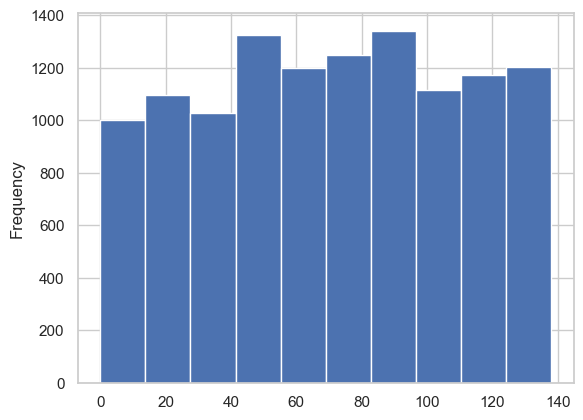

In [181]:
df_recency = valid_transactions[['visitorid','days_since_last_transaction']]
df_recency['days_since_last_transaction'].plot(kind='hist')

berdasarkan grafik, transaction terbanyak adalah terjadi pada recency 90

# 3.b berdasarkan hasil sebelumnya, bagi customer menjadi 4 kelompok berdasarkan aspek waktu transaksi terakhir.

In [448]:
# 3.b berdasarkan hasil sebelumnya, bagi customer menjadi 4 kelompok berdasarkan aspek waktu transaksi terakhir.¶
df_recency['R_score'] = pd.qcut(df_recency['days_since_last_transaction'],4,labels=[1,2,3,4])

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_7836/3255626586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency['R_score'] = pd.qcut(df_recency['days_since_last_transaction'],4,labels=[1,2,3,4])


In [303]:
df_recency.dtypes

visitorid                         int64
days_since_last_transaction       int64
R_score                        category
dtype: object

In [450]:
df_recency1 = df_recency

In [452]:
df_recency1['R_score'] = df_recency1['R_score'].map({1: 'baru_saja', 2: 'aktif', 3: 'kurang_aktif', 4: 'tidak_aktif'})
df_recency1

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_7836/3457643169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recency1['R_score'] = df_recency1['R_score'].map({1: 'baru_saja', 2: 'aktif', 3: 'kurang_aktif', 4: 'tidak_aktif'})


,visitorid,days_since_last_transaction,R_score
1476967,673776,138,tidak_aktif
1476928,563799,138,tidak_aktif
1476099,987715,138,tidak_aktif
1475925,729806,138,tidak_aktif
1475731,996991,138,tidak_aktif
...,...,...,...
1457781,62004,0,baru_saja
1456595,751256,0,baru_saja
1455216,569539,0,baru_saja
1460839,1298462,0,baru_saja


In [456]:
df_recency['R_score'].value_counts().reset_index()

,R_score,count
0,baru_saja,2995
1,kurang_aktif,2960
2,aktif,2900
3,tidak_aktif,2864


Baru Saja (1): 
Label ini dapat digunakan untuk pengguna yang baru saja melakukan transaksi, menunjukkan bahwa mereka sangat aktif dan terlibat dengan produk atau layanan.
Aktif(2): 
Label ini cocok untuk pengguna yang melakukan transaksi dalam waktu yang relatif dekat, tetapi tidak dalam waktu yang sangat baru. Mereka masih menunjukkan minat yang baik terhadap produk.
Kurang Aktif(3):
Label ini dapat digunakan untuk pengguna yang sudah lama tidak melakukan transaksi. Meskipun mereka pernah aktif, keterlibatan mereka saat ini mulai menurun.
Tidak Aktif (4):
Label ini menggambarkan pengguna yang sudah lama tidak melakukan transaksi. Mereka mungkin perlu diingatkan atau ditargetkan dengan kampanye pemasaran untuk menarik kembali minat mereka.

In [82]:
# CONTOH HASIL
latest_transaction

,visitorid,days_since_last_transaction,R_score
1465072,869008,138,1
1463096,345781,138,1
1464289,586756,138,1
1463462,435495,138,1
1464041,266417,138,1
...,...,...,...
1456595,751256,0,4
1460839,1298462,0,4
1457781,62004,0,4
1457810,427756,0,4


# 3.c Hitunglah banyaknya transaksi yang dilakukan oleh setiap uservisitor 
Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa banyak transaksi yang telah dilakukan

# 3.d berdasarkan hasil sebelumnya, bagi customer menjadi 4 kelompok berdasarkan banyaknya transaksi yang dilakukan

In [347]:
# 3.c Hitunglah banyaknya transaksi yang dilakukan oleh setiap uservisitor
# Output data yang diharapkan adalah dataframe dengan 2 kolom, yakni visitorid dan juga sudah berapa banyak transaksi yang telah dilakukan
import pandas as pd

# Filter transaksi yang valid
valid_transactions = df[(df['event'] == "transaction")]

# Hitung banyaknya transaksi per visitorid
transaction_counts = valid_transactions.groupby('visitorid').size().reset_index(name='transaction_count')

# Tampilkan hasilnya
transaction_counts

,visitorid,transaction_count
0,172,2
1,186,1
2,264,2
3,419,1
4,539,1
...,...,...
11714,1406787,1
11715,1406981,1
11716,1407070,1
11717,1407110,1


<Axes: ylabel='Frequency'>

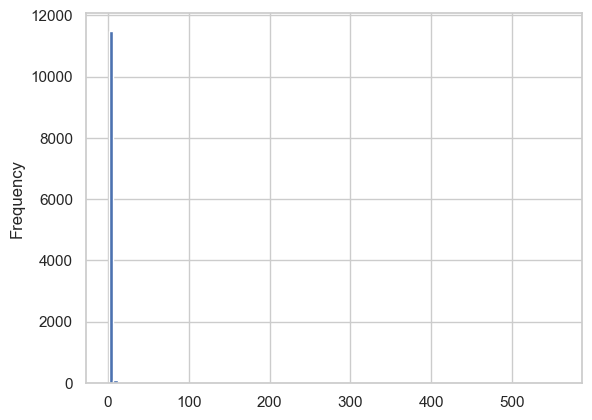

In [353]:
#Melihat distribusi Transaction
transaction_counts['transaction_count'].plot(kind='hist',bins=100)

In [ ]:
# df_frequency = valid_transactions.groupby('visitorid').agg({'transactionid':'nunique'})
# df_frequency['transactionid'] = pd.to_numeric(df_frequency['transactionid'], errors='coerce')
# # df_frequency['transactionid'] = df_frequency['transactionid'].astype('int64')
# df_frequency['transactionid'].plot(kind='hist',bins=100)

In [367]:
transaction_counts.dtypes

visitorid               int64
transaction_count       int64
group                category
dtype: object

In [365]:
#Menghitung jumlah transaction count
transaction_counts['transaction_count'].sum()

22457

In [379]:
# Mengelompokkan customer ke dalam 4 kelompok berdasarkan banyaknya transaksi
transaction_counts['F_score'] = pd.cut(transaction_counts['transaction_count'], bins=4, labels=[1,2,3,4])
transaction_counts = transaction_counts.drop(columns=['group'])

In [381]:
transaction_counts

,visitorid,transaction_count,F_score
0,172,2,1
1,186,1,1
2,264,2,1
3,419,1,1
4,539,1,1
...,...,...,...
11714,1406787,1,1
11715,1406981,1,1
11716,1407070,1,1
11717,1407110,1,1


In [385]:
#Melihat jumlah transaction count
transaction_counts['F_score'].value_counts()

F_score
1    11711
2        5
3        2
4        1
Name: count, dtype: int64

In [387]:
transaction_counts.groupby('F_score').agg({'transaction_count':['min','max','mean','median','count']})

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_7836/4277121482.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_counts.groupby('F_score').agg({'transaction_count':['min','max','mean','median','count']})


transaction_count                             
                      min  max      mean median  count
F_score                                               
1                       1  136    1.7405    1.0  11711
2                     145  189  176.0000  185.0      5
3                     286  349  317.5000  317.5      2
4                     559  559  559.0000  559.0      1

Berdasarkan tabel diatas terlihat jumlah transaksi yang terjadi sangat timpang sekali antara F_score 1, 2, 3, 4 sehingga perlu dilakukan pengelompokan kembali berdasarkan quantil nya.

In [407]:
#Melihat persebaran data
transaction_counts.query('transaction_count>0')['transaction_count'].describe(percentiles=[0.5,0.8,0.9,0.95,0.99,0.999])

count    11719.000000
mean         1.916290
std          8.850529
min          1.000000
50%          1.000000
80%          2.000000
90%          2.000000
95%          4.000000
99%         13.000000
99.9%      108.410000
max        559.000000
Name: transaction_count, dtype: float64

In [426]:
#Melakukan pengelompokan kembali berdasarkan nilai percentiles
import numpy as np
transaction_counts['F_score'] = pd.cut(transaction_counts['transaction_count'],bins=[0,4,13,100,np.Inf],labels=[1,2,3,4],right=True)

In [428]:
transaction_counts.groupby('F_score').agg({'transaction_count':['min','max','mean','median','count']})

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_7836/4277121482.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_counts.groupby('F_score').agg({'transaction_count':['min','max','mean','median','count']})


transaction_count                               
                      min  max        mean median  count
F_score                                                 
1                       1    4    1.270146    1.0  11342
2                       5   13    7.093985    6.0    266
3                      14  100   34.197917   26.0     96
4                     101  559  192.066667  145.0     15

In [433]:
transaction_counts1 = transaction_counts
transaction_counts1['F_score'] = transaction_counts1['F_score'].map({1: 'kaum_dalit', 2: 'kaum_sudra', 3: 'kaum_ksatria', 4: 'kaum_brahmana'})
transaction_counts1

,visitorid,transaction_count,F_score
0,172,2,kaum_dalit
1,186,1,kaum_dalit
2,264,2,kaum_dalit
3,419,1,kaum_dalit
4,539,1,kaum_dalit
...,...,...,...
11714,1406787,1,kaum_dalit
11715,1406981,1,kaum_dalit
11716,1407070,1,kaum_dalit
11717,1407110,1,kaum_dalit


In [437]:
transaction_counts1['F_score'].value_counts()

F_score
kaum_dalit       11342
kaum_sudra         266
kaum_ksatria        96
kaum_brahmana       15
Name: count, dtype: int64

In [444]:
transaction_counts1.groupby('F_score').agg({'transaction_count':['min','max','mean','median','count']})

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_7836/3905643227.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  transaction_counts1.groupby('F_score').agg({'transaction_count':['min','max','mean','median','count']})


transaction_count                               
                            min  max        mean median  count
F_score                                                       
kaum_dalit                    1    4    1.270146    1.0  11342
kaum_sudra                    5   13    7.093985    6.0    266
kaum_ksatria                 14  100   34.197917   26.0     96
kaum_brahmana               101  559  192.066667  145.0     15

In [478]:
transaction_counts1

,visitorid,transaction_count,F_score
0,172,2,kaum_dalit
1,186,1,kaum_dalit
2,264,2,kaum_dalit
3,419,1,kaum_dalit
4,539,1,kaum_dalit
...,...,...,...
11714,1406787,1,kaum_dalit
11715,1406981,1,kaum_dalit
11716,1407070,1,kaum_dalit
11717,1407110,1,kaum_dalit


In [480]:
transaction_counts1.isnull().sum()

visitorid            0
transaction_count    0
F_score              0
dtype: int64

Berdasarkan tabel diatas, Pengelompokkan F_score terlihat lebih masuk akal karena pengelompokan berdasarkan nilai persentile dari jumlah transaksi yang dilakukan.

Penjelasan F_score

1 - kaum_dalit (Frekuensi Sangat Rendah

2 - kaum_sudra (Frekuensi Rendah)

3 - kaum_ksatria (Frekuensi Menengah)

4 - kaum_brahmana (Frekuensi Tinggi)

# 3.e gabungkan hasil 3.b dan 3.d kedalam suatu dataframe dan lakukan analisis mengenai karakteristik customers dari aspek RF. Apa yang bisa disimpulkan ?

In [498]:
#Melihat df tabel df_recency1
df_recency1

,visitorid,days_since_last_transaction,R_score
1476967,673776,138,tidak_aktif
1476928,563799,138,tidak_aktif
1476099,987715,138,tidak_aktif
1475925,729806,138,tidak_aktif
1475731,996991,138,tidak_aktif
...,...,...,...
1457781,62004,0,baru_saja
1456595,751256,0,baru_saja
1455216,569539,0,baru_saja
1460839,1298462,0,baru_saja


In [496]:
#Melihat df transaction_counts
transaction_counts1

,visitorid,transaction_count,F_score
0,172,2,kaum_dalit
1,186,1,kaum_dalit
2,264,2,kaum_dalit
3,419,1,kaum_dalit
4,539,1,kaum_dalit
...,...,...,...
11714,1406787,1,kaum_dalit
11715,1406981,1,kaum_dalit
11716,1407070,1,kaum_dalit
11717,1407110,1,kaum_dalit


In [502]:
#Menggabungkan df df_recency1 dengan transaction_counts1 menggunakan fungsi merge
df_rf = pd.merge(df_recency1[['visitorid', 'R_score']], 
                 transaction_counts1[['visitorid', 'F_score']], 
                 on='visitorid', 
                 how='inner')

In [504]:
#Menampilkan df_rf
df_rf

,visitorid,R_score,F_score
0,673776,tidak_aktif,kaum_dalit
1,563799,tidak_aktif,kaum_dalit
2,987715,tidak_aktif,kaum_dalit
3,729806,tidak_aktif,kaum_dalit
4,996991,tidak_aktif,kaum_dalit
...,...,...,...
11714,62004,baru_saja,kaum_dalit
11715,751256,baru_saja,kaum_dalit
11716,569539,baru_saja,kaum_ksatria
11717,1298462,baru_saja,kaum_dalit


In [508]:
df_rf.value_counts()

visitorid  R_score       F_score   
172        baru_saja     kaum_dalit    1
947562     baru_saja     kaum_dalit    1
947609     aktif         kaum_dalit    1
947666     tidak_aktif   kaum_dalit    1
947829     aktif         kaum_dalit    1
                                      ..
479005     aktif         kaum_dalit    1
479127     baru_saja     kaum_dalit    1
479324     tidak_aktif   kaum_dalit    1
479343     tidak_aktif   kaum_dalit    1
1407398    kurang_aktif  kaum_dalit    1
Name: count, Length: 11719, dtype: int64

In [512]:
#Melakukan perhitungan berdasarkan grouping R_score dan F_score
count_df_rf = df_rf.groupby(['R_score', 'F_score']).size().reset_index(name='count')

/var/folders/gq/y63881xd0p95xkmph7t_jdvh0000gp/T/ipykernel_7836/722773212.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_df_rf = df_rf.groupby(['R_score', 'F_score']).size().reset_index(name='count')


In [514]:
count_df_rf

,R_score,F_score,count
0,baru_saja,kaum_dalit,2869
1,baru_saja,kaum_sudra,89
2,baru_saja,kaum_ksatria,30
3,baru_saja,kaum_brahmana,7
4,aktif,kaum_dalit,2804
5,aktif,kaum_sudra,73
6,aktif,kaum_ksatria,20
7,aktif,kaum_brahmana,3
8,kurang_aktif,kaum_dalit,2873
9,kurang_aktif,kaum_sudra,56
